# Protocol: Comparing the Start Over Strategy on Low-Connectivity Models

Date: 17.09.2021

## Question

Does the *Start Over* strategy (see EXP-04) yield the same performance increase on the Dining Philosophers / Anderson / Peterson models?

## Hypothesis

The Start Over strategy shows a large performance gain in terms of state space coverage by the number of VTs on the Waypoints model. According to the paper, DP/Anderson/Peterson may be "low connectivity" and thus harder to explore. This may impact the performance gain of our new strategy.

## Setup

- GPU: NVIDIA GeForce RTX 2080 Ti
- Program: `main` branch, commit 755ef1d
- Models: Philosophers, Anderson, Peterson

## Implementation

First experiment, we inspect the Dining Philosophers model and thus add the CUDA_FLAG `-DGRAPPLE_MODEL=PhilosophersStateV2`.

We first compile with the additional CUDA_FLAGS `-DGRAPPLE_HT=18 -DGRAPPLE_SO=0` (the default parameters).

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    6m24.247s
user    6m23.896s
sys     0m0.276s
```

Full output data is available at [EXP-13-start-overs-low-connectivity-1.csv](./data/EXP-11-bfs-frontiers-1.csv).

Then, we compile with the additional CUDA_FLAGS `-DGRAPPLE_HT=14 -DGRAPPLE_SO=15`.

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    5m34.964s
user    5m34.677s
sys     0m0.232s
```

Full output data is available at [EXP-13-start-overs-low-connectivity-2.csv](./data/EXP-11-bfs-frontiers-2.csv).

--

Second experiment, we inspect `-DGRAPPLE_MODEL=AndersonState`.

We first compile with the additional CUDA_FLAGS `-DGRAPPLE_HT=18 -DGRAPPLE_SO=0` (the default parameters).

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    2m6.053s
user    2m5.735s
sys     0m0.216s
```

Full output data is available at [EXP-13-start-overs-low-connectivity-3.csv](./data/EXP-11-bfs-frontiers-3.csv).

Then, we compile with the additional CUDA_FLAGS `-DGRAPPLE_HT=14 -DGRAPPLE_SO=15`.

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    1m9.185s
user    1m8.915s
sys     0m0.200s
```

Full output data is available at [EXP-13-start-overs-low-connectivity-4.csv](./data/EXP-11-bfs-frontiers-4.csv).

---

Third experiment, we inspect `-DGRAPPLE_MODEL=PetersonState`.

We first compile with the additional CUDA_FLAGS `-DGRAPPLE_HT=18 -DGRAPPLE_SO=0` (the default parameters).

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    2m20.227s
user    2m19.973s
sys     0m0.192s
```

Full output data is available at [EXP-13-start-overs-low-connectivity-5.csv](./data/EXP-11-bfs-frontiers-5.csv).

Then, we compile with the additional CUDA_FLAGS `-DGRAPPLE_HT=14 -DGRAPPLE_SO=15`.

```
$ time ./build/grapple -s 1736331306 -n 500 -q

real    1m57.147s
user    1m56.856s
sys     0m0.212s
```

Full output data is available at [EXP-13-start-overs-low-connectivity-6.csv](./data/EXP-11-bfs-frontiers-6.csv).

## Evaluation

For the Waypoints model's results, see EXP-04.

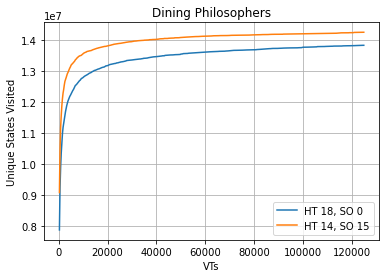

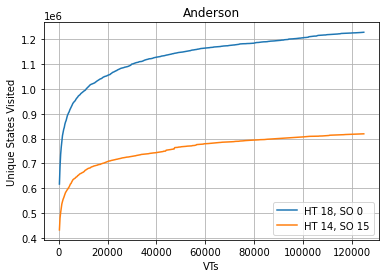

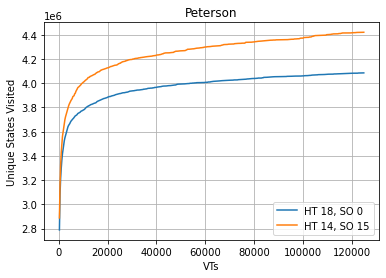

In [8]:
import pandas as pd

e1 = pd.read_csv("data/EXP-13-start-overs-low-connectivity-1.csv", skipinitialspace=True)
e2 = pd.read_csv("data/EXP-13-start-overs-low-connectivity-2.csv", skipinitialspace=True)
e3 = pd.read_csv("data/EXP-13-start-overs-low-connectivity-3.csv", skipinitialspace=True)
e4 = pd.read_csv("data/EXP-13-start-overs-low-connectivity-4.csv", skipinitialspace=True)
e5 = pd.read_csv("data/EXP-13-start-overs-low-connectivity-5.csv", skipinitialspace=True)
e6 = pd.read_csv("data/EXP-13-start-overs-low-connectivity-6.csv", skipinitialspace=True)

def plot_usv(data1, data2, title):
    pp = data1.plot(x="vts", xlabel="VTs", y="visited", ylabel="Unique States Visited", grid=True, legend=False, title=title)
    data2.plot(ax=pp, x="vts", xlabel="VTs", y="visited", ylabel="Unique States Visited", grid=True, legend=False)
    pp.legend([
        "HT 18, SO 0",
        "HT 14, SO 15"
    ])

plot_usv(e1, e2, "Dining Philosophers")
plot_usv(e3, e4, "Anderson")
plot_usv(e5, e6, "Peterson")


## Conclusion, Discussion
